In [1]:
import scanpy as sc

In [2]:
import bbknn

In [3]:
import pandas as pd

In [36]:
scell=sc.read("/storeData/USER/data/02.Bioinformatics_for_STOmics/01.user/qiuying/05.SDAS/00.data/01.paper_data/CRC_NC/sdas_rerun/rawdata/single_cell.h5ad")
scell

AnnData object with n_obs × n_vars = 27154 × 30893
    obs: 'id', 'patient_No', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'cellname', 'leiden', 'annotation', 'annotation2', 'type'
    var: 'gene_ids-P146_T_1', 'n_cells-P146_T_1', 'gene_ids-P146_T_2', 'n_cells-P146_T_2', 'gene_ids-P147_T_1', 'n_cells-P147_T_1', 'gene_ids-P147_T_2', 'n_cells-P147_T_2', 'gene_ids-P148_T_1', 'n_cells-P148_T_1', 'gene_ids-P148_T_2', 'n_cells-P148_T_2', 'gene_ids-P24_T_1', 'n_cells-P24_T_1', 'gene_ids-P24_T_2', 'n_cells-P24_T_2', 'gene_ids-P24_T_3', 'n_cells-P24_T_3', 'gene_ids-P27_T_1', 'n_cells-P27_T_1', 'gene_ids-P30_T_1', 'n_cells-P30_T_1', 'gene_ids-P30_T_2', 'n_cells-P30_T_2', 'gene_ids-P31_T_1', 'n_cells-P31_T_1', 'gene_ids-P31_T_2', 'n_cells-P31_T_2', 'gene_ids-P31_T_3', 'n_cells-P31_T_3', 'gene_ids-P32_T_1', 'n_cells-P32_T_1', 'gene_ids-P34_T_1', 'n_cells-P34_T_1', 'gene_ids-P34_T_2', 'n_cells-P34_T_2', 'gene_ids-P34_T_3', 'n_cells-P34_T_3', 'gene_i

### Fig 3a Expression profiling of PDCD1 and CD274 in single cell cluster

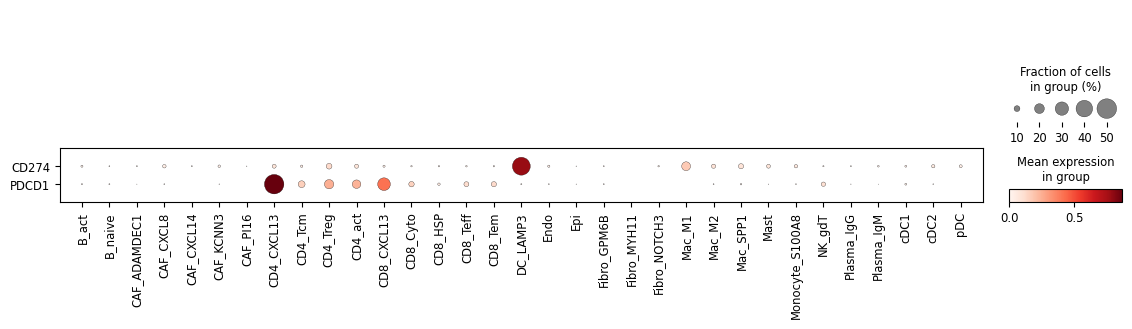

In [38]:
sc.pl.dotplot(scell, ["CD274","PDCD1"], groupby="annotation2",swap_axes=True)

### 单细胞CAF重聚类

In [34]:
adata=sc.read("/storeData/USER/data/02.Bioinformatics_for_STOmics/01.user/qiuying/05.SDAS/00.data/01.paper_data/CRC_NC/sdas_rerun/output/monocle3/single_cell_subset.h5ad")

### 过滤adata

In [6]:
adata=adata[adata.obs["n_genes_by_counts"]>=350]
adata

View of AnnData object with n_obs × n_vars = 1780 × 30893
    obs: 'id', 'patient_No', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'cellname', 'leiden', 'annotation', 'annotation2', 'type'
    var: 'gene_ids-P146_T_1', 'n_cells-P146_T_1', 'gene_ids-P146_T_2', 'n_cells-P146_T_2', 'gene_ids-P147_T_1', 'n_cells-P147_T_1', 'gene_ids-P147_T_2', 'n_cells-P147_T_2', 'gene_ids-P148_T_1', 'n_cells-P148_T_1', 'gene_ids-P148_T_2', 'n_cells-P148_T_2', 'gene_ids-P24_T_1', 'n_cells-P24_T_1', 'gene_ids-P24_T_2', 'n_cells-P24_T_2', 'gene_ids-P24_T_3', 'n_cells-P24_T_3', 'gene_ids-P27_T_1', 'n_cells-P27_T_1', 'gene_ids-P30_T_1', 'n_cells-P30_T_1', 'gene_ids-P30_T_2', 'n_cells-P30_T_2', 'gene_ids-P31_T_1', 'n_cells-P31_T_1', 'gene_ids-P31_T_2', 'n_cells-P31_T_2', 'gene_ids-P31_T_3', 'n_cells-P31_T_3', 'gene_ids-P32_T_1', 'n_cells-P32_T_1', 'gene_ids-P34_T_1', 'n_cells-P34_T_1', 'gene_ids-P34_T_2', 'n_cells-P34_T_2', 'gene_ids-P34_T_3', 'n_cells-P34_T_3', 

### adata.X更改为原始矩阵

In [8]:
adata.X=adata.layers["raw_counts"].copy()

/storeData/USER/data/02.Bioinformatics_for_STOmics/01.user/qiuying/00.software/miniconda3/envs/newst/lib/python3.10/site-packages/anndata/_core/anndata.py:617: FutureWarning: You are attempting to set `X` to a matrix on a view which has non-unique indices. The resulting `adata.X` will likely not equal the value to which you set it. To avoid this potential issue, please make a copy of the data first. In the future, this operation will throw an error.
  warnings.warn(msg, FutureWarning, stacklevel=1)


In [9]:
adata.X.A.sum()

13275492.0

### 存adata，用于拟时序分析

In [10]:
adata.write("../output/monocle3/single_cell_subset_filter.h5ad", compression="gzip")

In [11]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata
adata.layers["log1p"] = adata.X.copy()
sc.pp.highly_variable_genes(adata, n_top_genes = 3000)

/storeData/USER/data/02.Bioinformatics_for_STOmics/01.user/qiuying/00.software/miniconda3/envs/newst/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [12]:
sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])
sc.pp.scale(adata, max_value=10)

In [13]:
sc.tl.pca(adata, svd_solver="arpack")

In [14]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=30) #find neighbors
sc.tl.umap(adata) #calculate UMAP coordinates

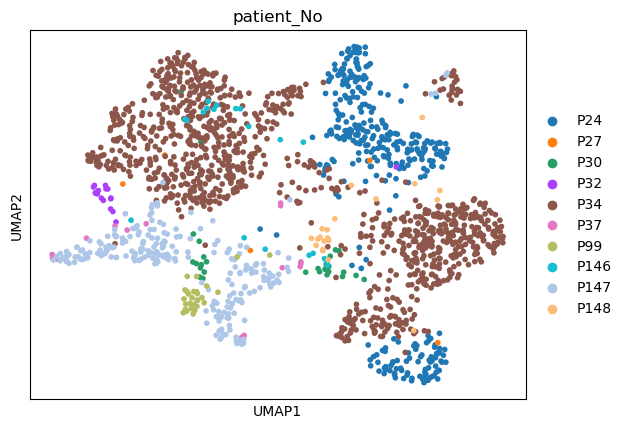

In [15]:
sc.pl.umap(adata,color=["patient_No"])

### bbknn进行批次校正

In [16]:
sc.external.pp.bbknn(adata, batch_key="patient_No")

In [17]:
adata.obs["patient_No"]

CELL223_N2-P24_T_1     P24
CELL886_N1-P24_T_1     P24
CELL809_N1-P24_T_1     P24
CELL463_N2-P24_T_1     P24
CELL788_N1-P24_T_1     P24
                      ... 
CELL1075_N1-P99_T_2    P99
CELL858_N1-P99_T_2     P99
CELL1030_N1-P99_T_2    P99
CELL1097_N1-P99_T_2    P99
CELL1100_N1-P99_T_2    P99
Name: patient_No, Length: 1780, dtype: category
Categories (10, object): ['P24', 'P27', 'P30', 'P32', ..., 'P99', 'P146', 'P147', 'P148']

In [18]:
sc.tl.umap(adata)

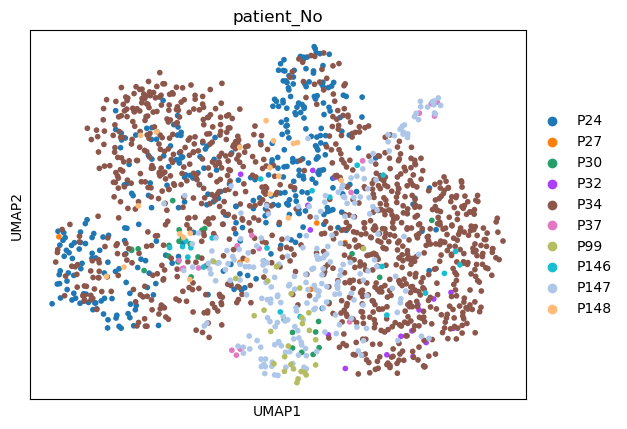

In [19]:
sc.pl.umap(adata,color=["patient_No"])

In [21]:
del adata.uns["annotation2_colors"]

In [22]:
adata.uns["annotation2_colors"] =['#1f77b4', '#2ca02c', '#ff7f0e',  '#d62728', '#9467bd']

### Fig4e UMAP of CAF subclusters

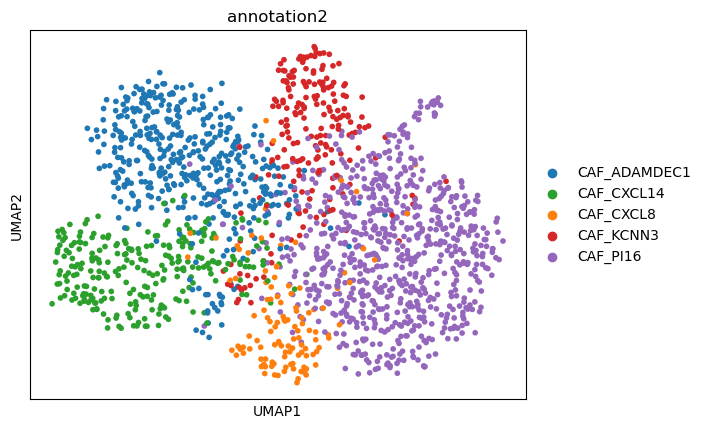

In [23]:
sc.pl.umap(adata,color=["annotation2"])

### Fig 4f marker genes in each cluster

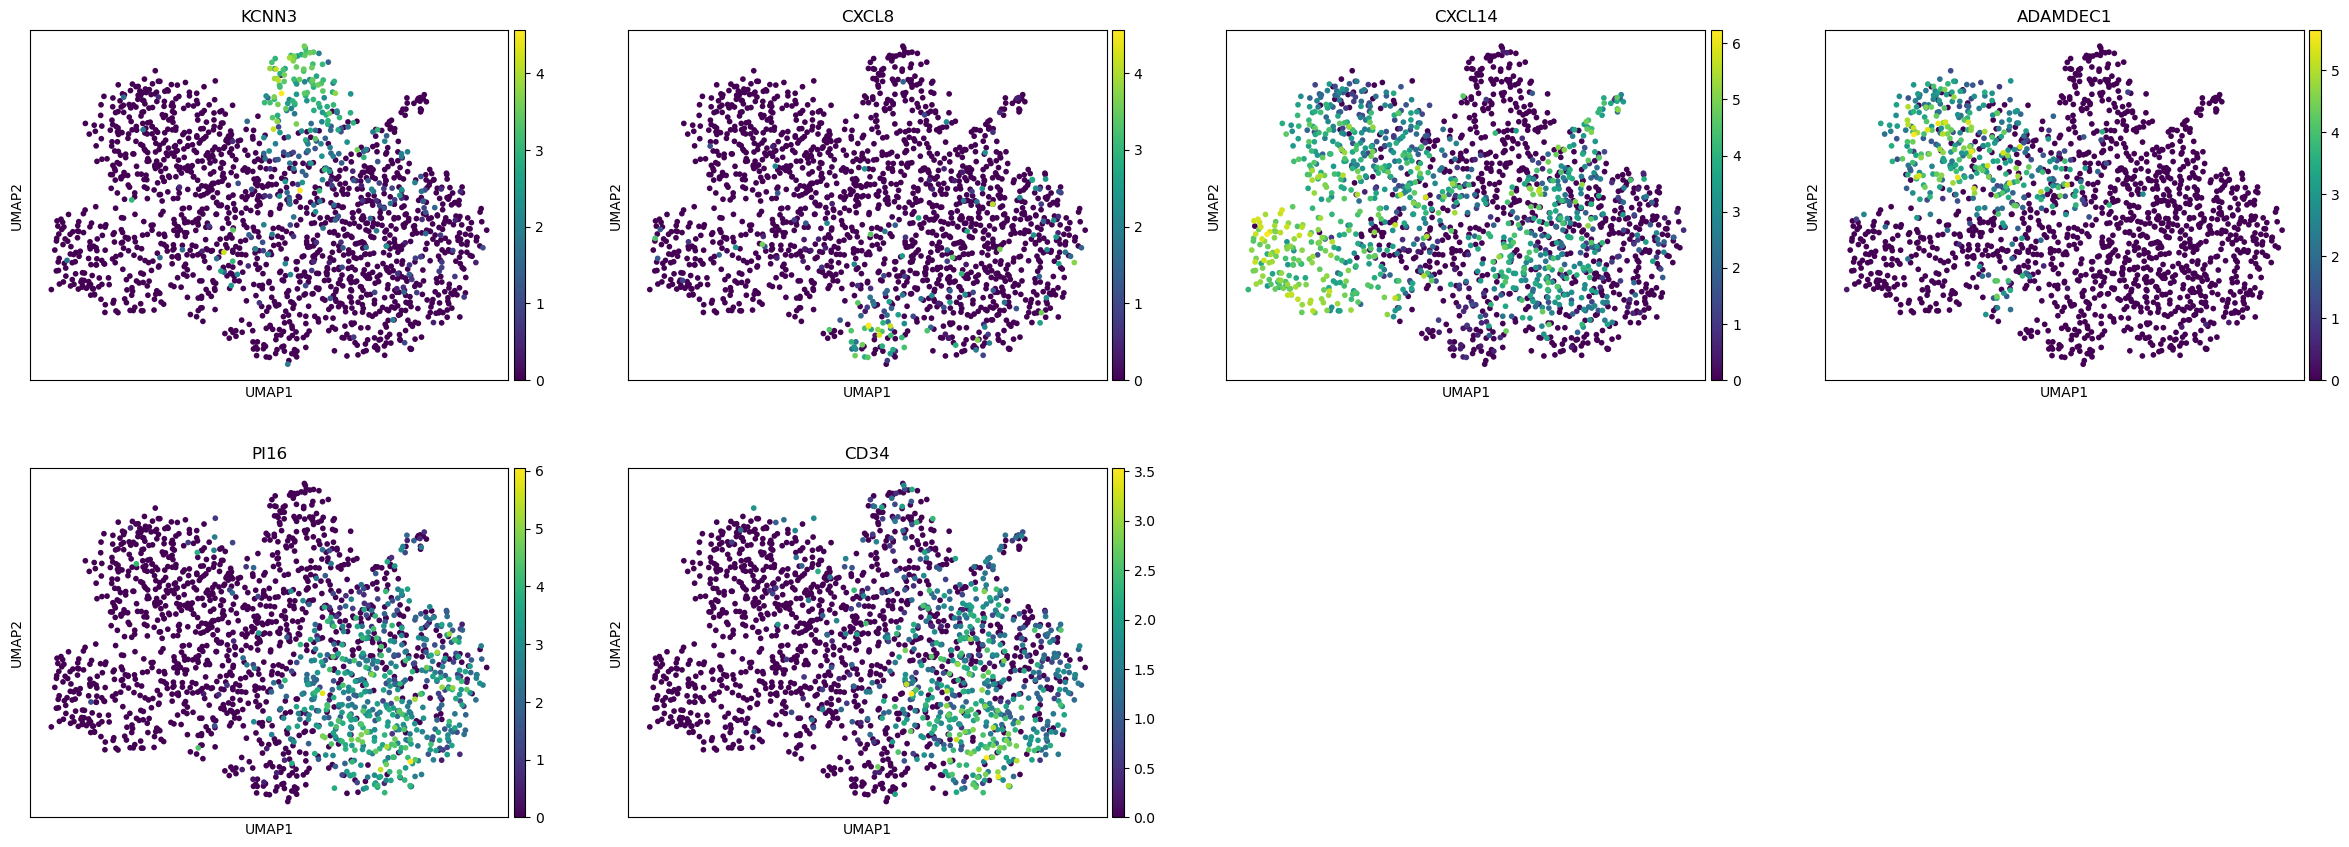

In [24]:
sc.pl.umap(adata,color=["KCNN3","CXCL8","CXCL14","ADAMDEC1","PI16","CD34"])

In [25]:
adata.obsm["X_umap"]

array([[ 5.7640038 ,  0.09416591],
       [ 9.492494  , -0.21007457],
       [10.517462  ,  3.81346   ],
       ...,
       [11.876269  ,  0.6979023 ],
       [10.293013  , -1.8120408 ],
       [10.366822  , -1.564921  ]], dtype=float32)

In [26]:
umap_coords=adata.obsm["X_umap"]

In [27]:
umap_df = pd.DataFrame(umap_coords, index=adata.obs_names, columns=['umap1', 'umap2'])

In [28]:
umap_df

,umap1,umap2
CELL223_N2-P24_T_1,5.764004,0.094166
CELL886_N1-P24_T_1,9.492494,-0.210075
CELL809_N1-P24_T_1,10.517462,3.813460
CELL463_N2-P24_T_1,8.180242,2.924743
CELL788_N1-P24_T_1,6.906286,-0.913806
...,...,...
CELL1075_N1-P99_T_2,10.424415,-0.348809
CELL858_N1-P99_T_2,10.649254,-1.042557
CELL1030_N1-P99_T_2,11.876269,0.697902
CELL1097_N1-P99_T_2,10.293013,-1.812041


In [29]:
umap_df.to_csv('../output/monocle3/umap_coordinates.csv', index=False)